In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size':22})
import warnings
warnings.filterwarnings('ignore')

In [11]:
from scipy.stats import norm, t

In [4]:
ibov = yf.download("^BVSP")[["Close"]]
ibov

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,^BVSP
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2025-02-14,128219.000000
2025-02-17,128869.000000


In [6]:
ibov['retorno'] = ibov['Close'].pct_change()
ibov.dropna(inplace=True)

In [7]:
media_ibov = ibov['retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_ibov*100))


Retorno médio = 0.13%


In [8]:
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão = 2.15%


In [9]:
ibov[ibov["retorno"]< -0.12]

Price,Close,retorno
Ticker,^BVSP,
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


In [12]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov,scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000082%


In [13]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias '. format(int(round(frequencia_teorica,5))) )
print('Ou uma vez a cada {} anos '. format(int(round(frequencia_teorica/252,5))))

Uma vez a cada 121293456 dias 
Ou uma vez a cada 481323 anos 


In [14]:
ibov[ibov["retorno"] > 0.05].size / ibov.size * 100

1.8022591699454245

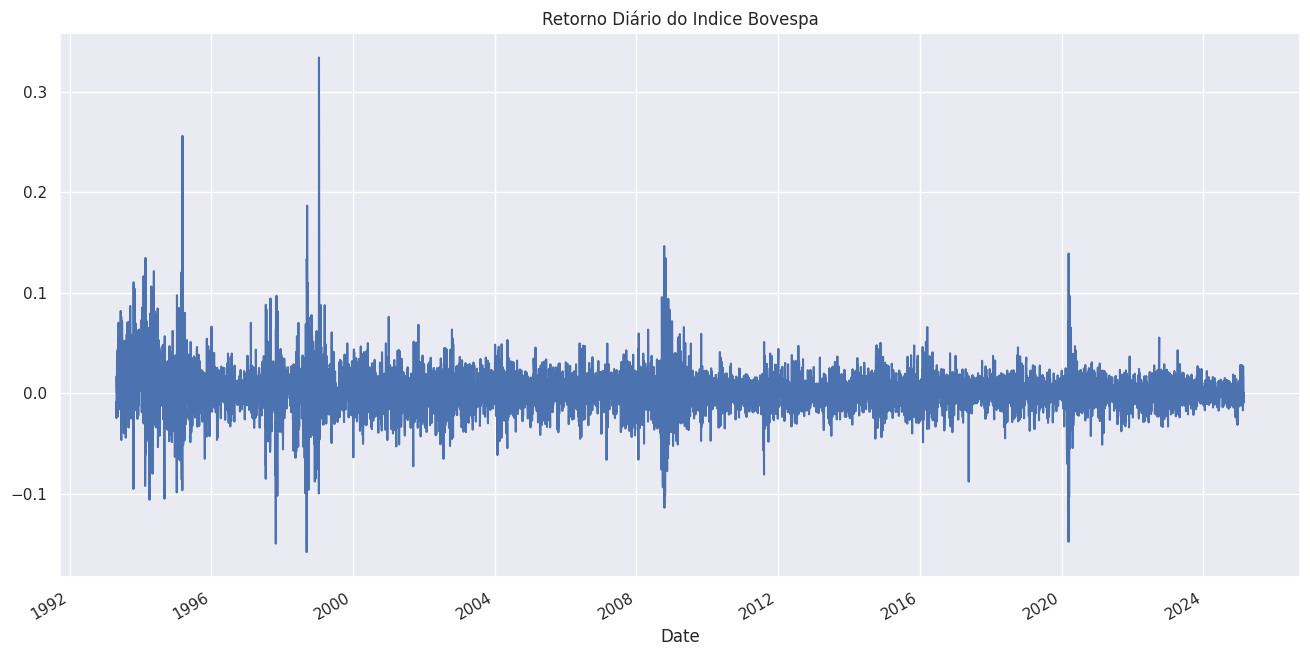

In [15]:
ibov["retorno"].plot(title="Retorno Diário do Indice Bovespa");

In [16]:
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size, loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

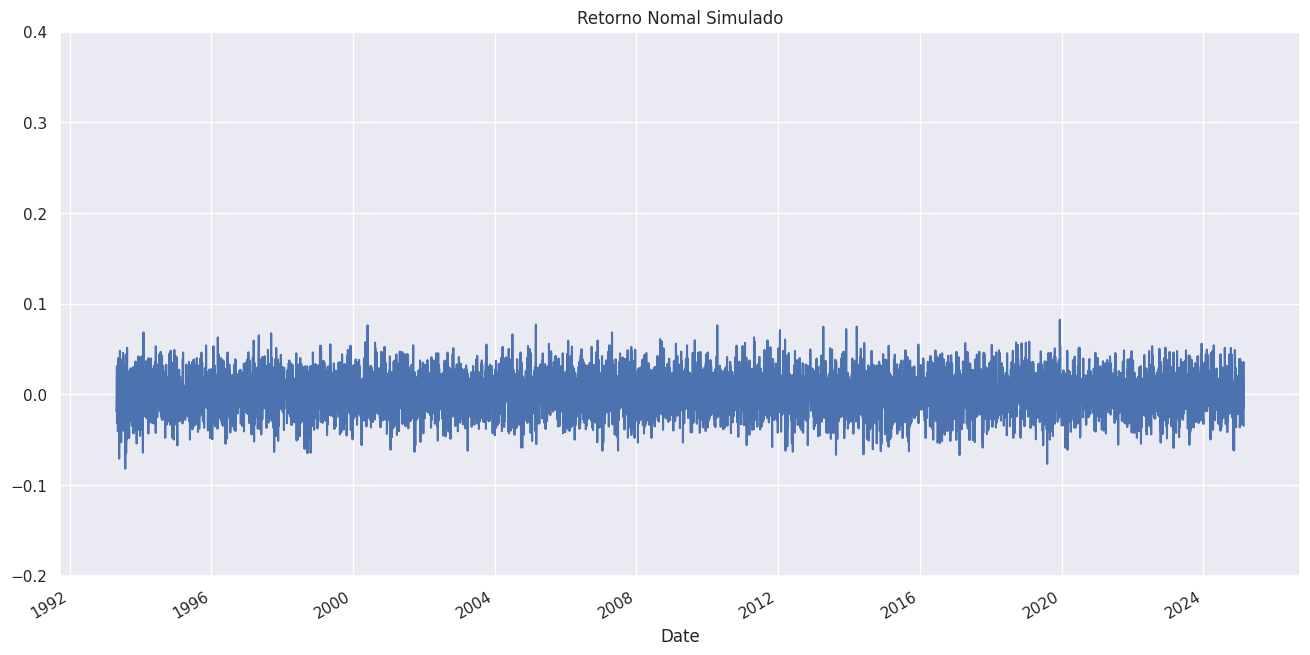

In [17]:
ax = ibov['retorno_teorico'].plot(title="Retorno Nomal Simulado");
ax.set_ylim(-0.2, 0.4)

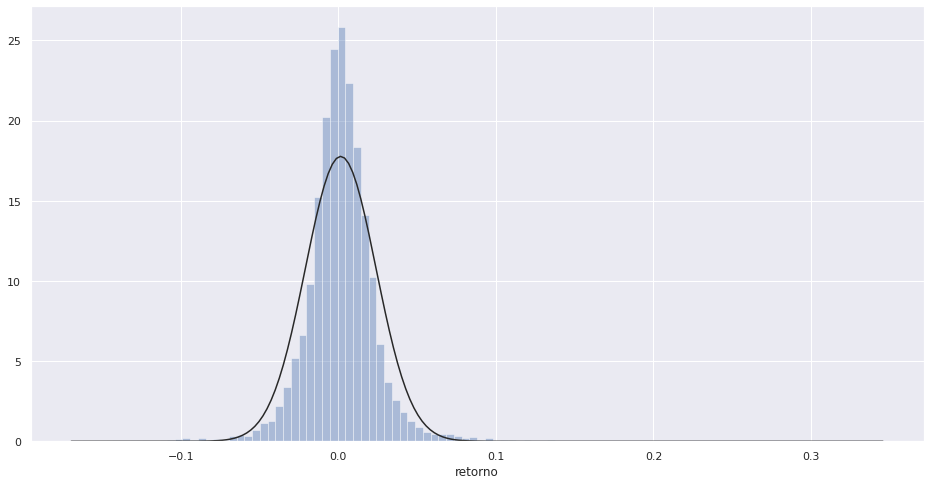

In [ ]:
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=norm);

In [ ]:
(graus_de_liberdade, media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4} \nDesvio padrão={:.5f}' .format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.27 
Média=0.001235 
Desvio padrão=0.01433


In [ ]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade, loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.12419796%


In [ ]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 805 dias
Ou uma vez a cada 3 anos


In [ ]:
frequencia_teorica_t = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252,5))))

Para uma distribuição Normal: 
Uma vez a cada 31802434 dias
Ou uma vez a cada 126200 anos


In [ ]:
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].size
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 466 dias
